In [37]:
#Declare required libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import streamlit as st

In [3]:
df = pd.read_csv('car_prices.csv')

df.shape


(558838, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558838 entries, 0 to 558837
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558838 non-null  int64  
 1   make          548537 non-null  object 
 2   model         548439 non-null  object 
 3   trim          548187 non-null  object 
 4   body          545643 non-null  object 
 5   transmission  493486 non-null  object 
 6   vin           558834 non-null  object 
 7   state         558838 non-null  object 
 8   condition     547018 non-null  float64
 9   odometer      558744 non-null  float64
 10  color         558089 non-null  object 
 11  interior      558089 non-null  object 
 12  seller        558838 non-null  object 
 13  mmr           558800 non-null  float64
 14  sellingprice  558826 non-null  float64
 15  saledate      558826 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)
558837,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [7]:
print(df.duplicated().sum())

1


In [8]:
df [df.duplicated()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558837,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [9]:
df = df.drop_duplicates()

print(df.duplicated().sum())


0


In [10]:
# Check and count the number of missing values (NA/null) in each column of the DataFrame.

df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [11]:
df.drop(columns=['vin'], inplace=True)

df.shape

(558837, 15)

In [12]:
#filling missing values

mode_value = df ['transmission'].mode()[0]

df['transmission'].fillna (mode_value, inplace=True)

df.isna().sum()

C:\Users\hoang\AppData\Local\Temp\ipykernel_9748\1996981449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].fillna (mode_value, inplace=True)


year                0
make            10301
model           10399
trim            10651
body            13195
transmission        0
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [13]:
df.dropna(inplace=True)

df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [14]:
# Convert column 'year' to datetime 
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Convert the saledate column to datetime and keep only the date part and remove the time part. 
df['saledate'] = pd.to_datetime(df['saledate'], utc=True, format='mixed').dt.date

In [16]:
df = df.loc[(df['sellingprice'] <= 175000)]

df = df.loc[(df['condition'] > 10)]

In [19]:
#The function calculates basic statistics

def calculate_statistics (data, column):
    mean = data[column].mean()

    median = data[column].median()

    std_dev = data[column].std()

    return mean, median, std_dev

 

In [25]:
#Create a function to group columns and calculate counts
def group_and_count(df, group_col, count_col):
    # Group and total quantities
    grouped_df = df.groupby(group_col)[count_col].count().reset_index()
    return grouped_df
    """
    The function groups data by column 'group_col' and counts by column 'count_col'.
    Parameters:
    - df: DataFrame contains data
    - group_col: Column name used for grouping (eg: 'make', 'year')
    - count_col: Column name used to count quantity (eg 'sales')
    Return:
    - New DataFrame after grouping and counting
    """
   




In [26]:
def plot_pie_chart(df, column):

    data = df [column].value_counts()
    
    plt.figure(figsize=(10, 8))
    
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(data)))
    
    plt.title(f'Ratio of values in the column {column}')
    
    plt.axis('equal')
    
    plt.show()

In [28]:
def plot_bar_chart(df, x, y, hue=None):

    plt.figure(figsize=(12, 6))
    
    sns.barplot(data=df, x=x, y=y, hue=hue, palette='viridis')
    
    plt.title(f'Column chart: {y} against {x}', fontsize=16)
    
    plt.xlabel(x, fontsize=14)
    
    plt.ylabel(y, fontsize=14)
    
    plt.xticks(rotation=45)
    
    plt.show()

In [29]:
def scatter_plot(data, x_column, y_column):

    plt.figure(figsize=(10, 8))
    
    plt.scatter(data[x_column], data[y_column], color="b", alpha=0.5, marker="o")
    
    plt.title(f'Scatter Plot of {y_column} over {x_column}')
    
    plt.xlabel(x_column)
    
    plt.ylabel(y_column)
    
    plt.grid(True)
    
    plt.show()

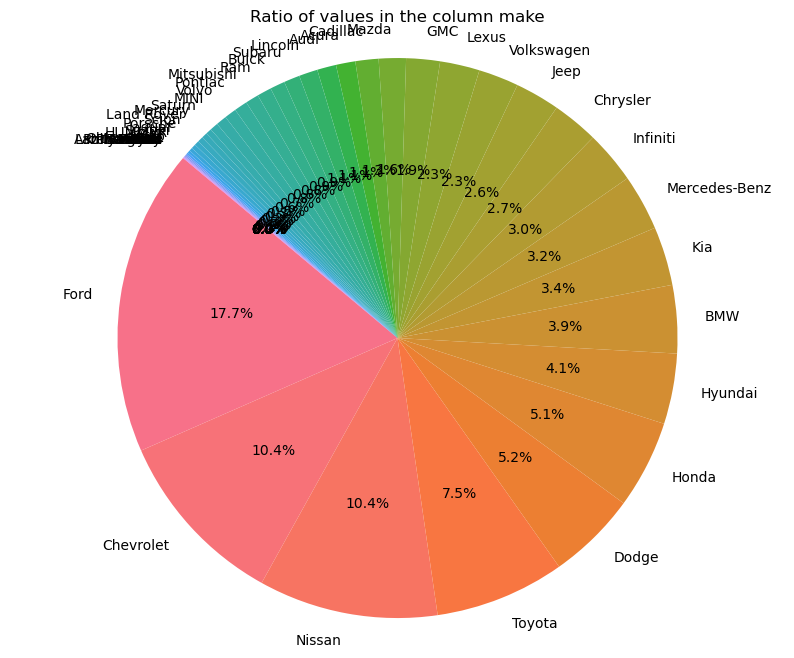

In [30]:
plot_pie_chart(df,'make')

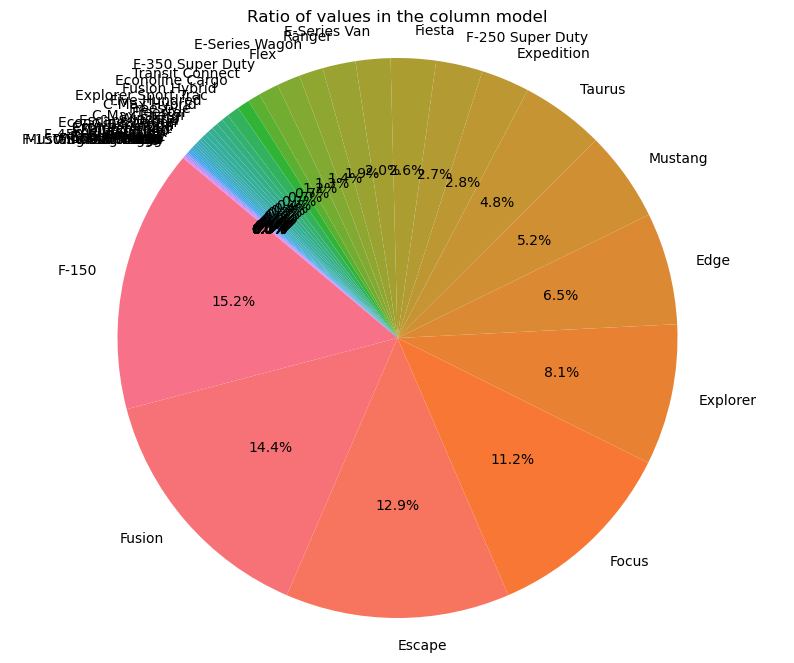

In [31]:
#Filter DataFrame by car brand 
data = df [df['make'] == 'Ford']

# Ratio of car models within the car brand

plot_pie_chart(data, 'model')



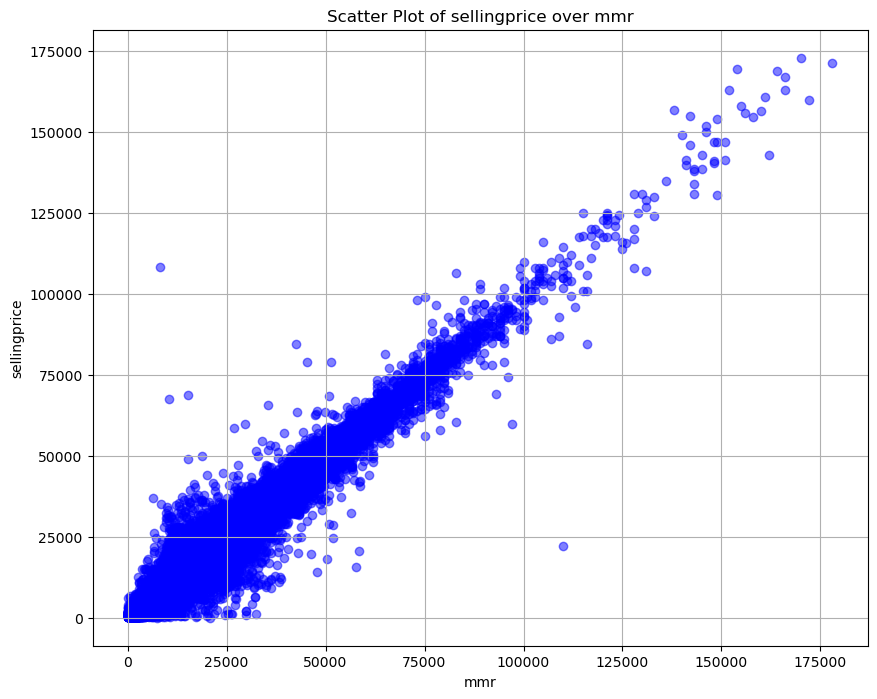

In [32]:
scatter_plot(df, 'mmr', 'sellingprice')


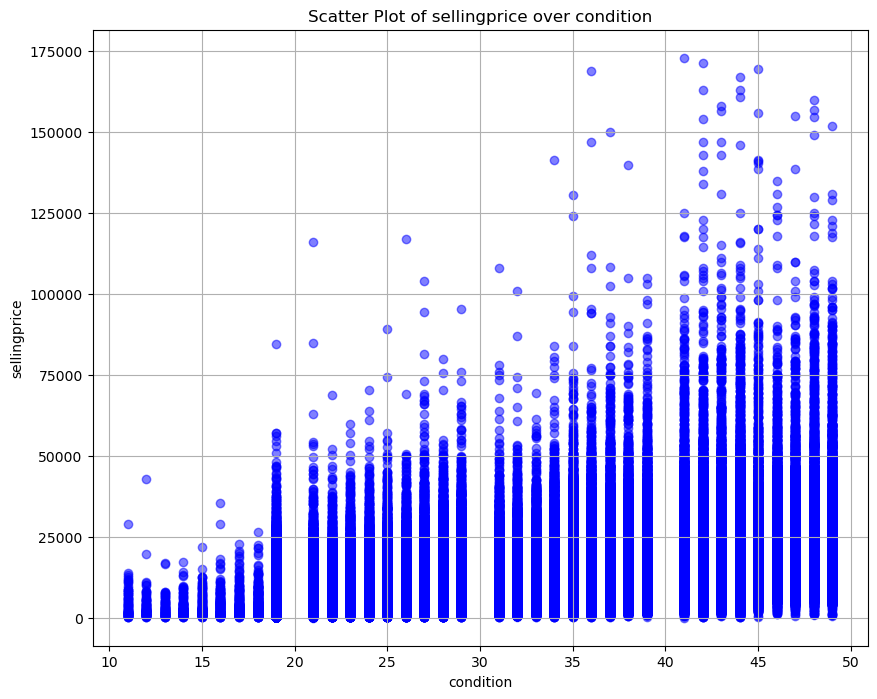

In [33]:
scatter_plot(df, 'condition', 'sellingprice')


C:\Users\hoang\AppData\Local\Temp\ipykernel_9748\2983187150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x, y=y, hue=hue, palette='viridis')


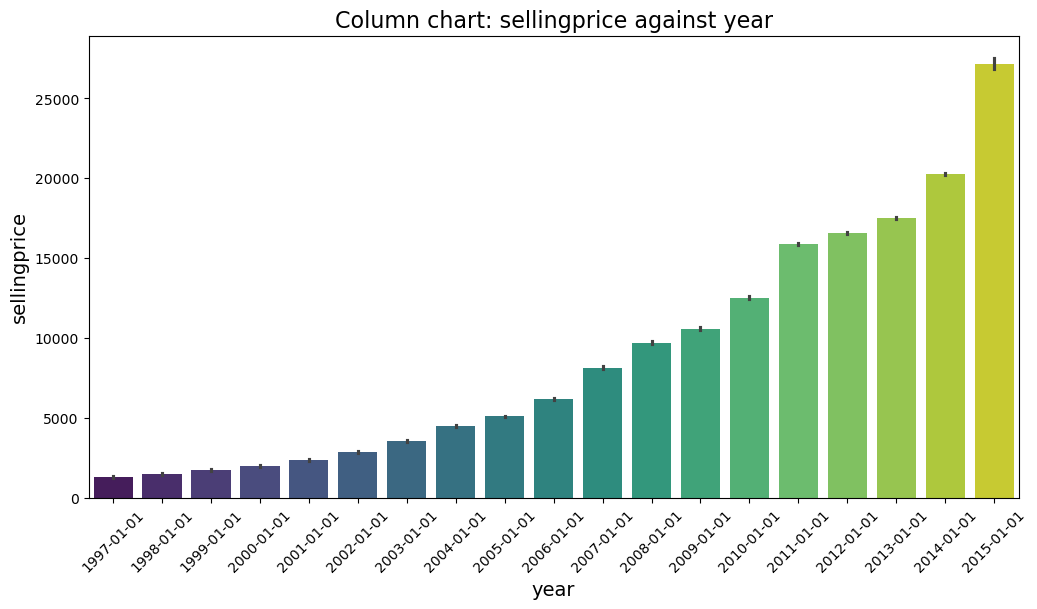

In [34]:
df_sorted =  df.sort_values(by='year', ascending=True)

plot_bar_chart(df_sorted, 'year', 'sellingprice', hue=None)



In [35]:
salequantity = group_and_count(df, 'year', 'make')

salequantity = salequantity.rename(columns={'make': 'salequantity'})

print(salequantity )



         year  salequantity
0  1997-01-01           786
1  1998-01-01          1088
2  1999-01-01          1844
3  2000-01-01          2944
4  2001-01-01          4576
5  2002-01-01          7149
6  2003-01-01          9881
7  2004-01-01         13189
8  2005-01-01         16491
9  2006-01-01         21208
10 2007-01-01         25325
11 2008-01-01         27219
12 2009-01-01         18111
13 2010-01-01         23305
14 2011-01-01         43974
15 2012-01-01         93446
16 2013-01-01         89099
17 2014-01-01         60365
18 2015-01-01          6046


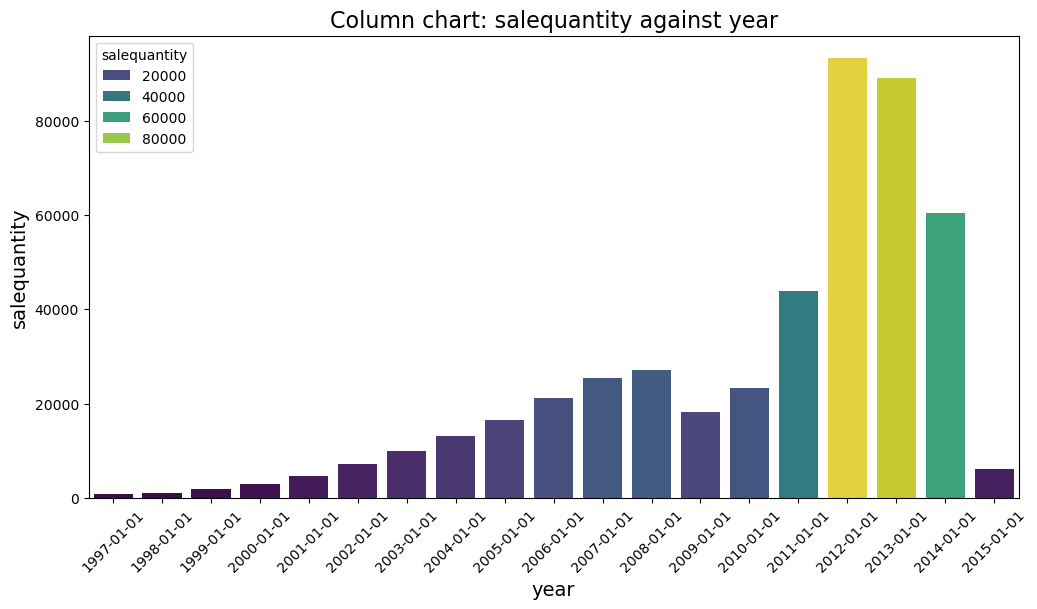

In [36]:
plot_bar_chart(salequantity, 'year', 'salequantity', hue='salequantity')
